# 4.3

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pareto

#pareto corrente
alpha = 2.0   # shape
xm = 2000     # scale (mínimo)
rng = np.random.default_rng(42)

samples_pareto_1 = pareto.rvs(alpha, scale=xm, size=100000, random_state=rng)

In [2]:
#nova pareto
alpha = 2.0   # shape
xm = 1.06*(2000)      # scale (mínimo)
rng = np.random.default_rng(42)

samples_pareto_2 = pareto.rvs(alpha, scale=xm, size=100000, random_state=rng)

In [3]:
ratios = []

for d  in np.linspace(2000, 4000, 1000):


    excess_loss_variable_1 = [x for x in samples_pareto_1 if x > d]
    excess_loss_variable_2 = [x for x in samples_pareto_2 if x > d]

    proportion_1 = len(excess_loss_variable_1)/len(samples_pareto_1)
    proportion_2 = len(excess_loss_variable_2)/len(samples_pareto_2)

    ratios.append(proportion_2/proportion_1)




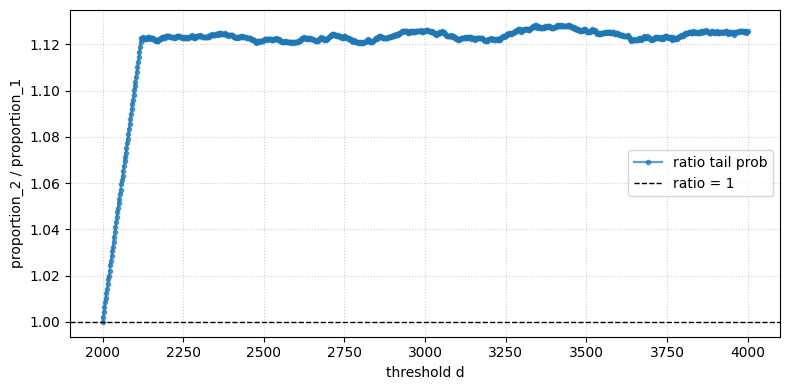

In [4]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(np.linspace(2000, 4000, 1000), ratios, color='tab:blue', lw=1.6, marker='o', markersize=3, alpha=0.7, label='ratio tail prob')
ax.axhline(1.0, color='k', lw=1, ls='--', label='ratio = 1')
ax.set_xlabel('threshold d')
ax.set_ylabel('proportion_2 / proportion_1')
ax.grid(True, which='both', ls=':', alpha=0.6)
ax.legend()
plt.tight_layout()
plt.show()

In [5]:
ratios

[1.0,
 1.0020341292824433,
 1.0041672942712256,
 1.0063905801841695,
 1.0086440797635738,
 1.0104990854983276,
 1.01250442970688,
 1.014425125281503,
 1.0164667615368976,
 1.018423277082421,
 1.020043861886061,
 1.0221395424903408,
 1.0244432151125864,
 1.026504342113367,
 1.0285103056732627,
 1.0304391731756075,
 1.0324179227751393,
 1.0345862172424138,
 1.0367313932633193,
 1.0389286567691396,
 1.0409510128453356,
 1.0431226920910437,
 1.045379943340407,
 1.0474494605635278,
 1.0493619879113498,
 1.0514141520344864,
 1.0532746308272418,
 1.055442388677214,
 1.057194206575748,
 1.0595801943270076,
 1.0613232578378724,
 1.0631624831222954,
 1.065393876116,
 1.0672358591248665,
 1.0693471635566487,
 1.0711454829794984,
 1.0731340881043088,
 1.075268817204301,
 1.0773075928639146,
 1.0790629417413917,
 1.081174588072482,
 1.083400143008819,
 1.085575952321504,
 1.0876776993441304,
 1.0897638481741008,
 1.0918341722259224,
 1.093996149133555,
 1.095926441417252,
 1.0981046713372717,
 1.10

In [6]:
samples_pareto_1.min()

np.float64(2000.0131686862671)

# 4.4

In [7]:
import numpy as np
from scipy.stats import lomax  # shape = alpha, scale = lambda

# distribuicao 2
alpha = 3
lam = 2000
rng = np.random.default_rng(10)

samples_pareto_1 = lomax.rvs(alpha, scale=lam, size=1000000, random_state=rng)

In [8]:
# distribuicao 2
alpha = 5
lam = 2000
rng = np.random.default_rng(10)

samples_pareto_2 = lomax.rvs(alpha, scale=lam, size=1000000, random_state=rng)


In [9]:
a = 0.4
u = rng.random(len(samples_pareto_1))
mix_samples = np.where(u < a, samples_pareto_1, samples_pareto_2)


In [10]:
np.mean(mix_samples)

np.float64(701.8422835092166)

In [11]:
#esperado
a*lam/(3 - 1) + (1 - a)*lam/(3 + 1)

700.0

In [12]:
np.mean(mix_samples**2)

np.float64(1995410.2616674197)

In [13]:
((a*2*(lam**2))/((3-1)*(3-2))) + ((1-a)*2*(lam**2))/(3*(3+1))

2000000.0

# 4.7

In [14]:
import numpy as np
from scipy.stats import norm

mu = 3000
sigma = 1000
rng = np.random.default_rng(42)

# primeira normal
samples_normal_1 = norm.rvs(loc=mu, scale=sigma, size=1000000, random_state=rng)

mu = 4000
sigma = 1000

# segunda normal
samples_normal_2 = norm.rvs(loc=mu, scale=sigma, size=1000000, random_state=rng)

In [15]:
u = rng.random(len(samples_normal_1))
mix_samples = np.where(u < 0.75, samples_normal_1, samples_normal_2)

In [16]:
np.mean(mix_samples > 5000)

np.float64(0.056689)

# 4.8

In [25]:
import numpy as np
from scipy.stats import burr12  # Burr XII

#distribuição 1
gamma = 2.0   # shape c
alpha = 1.0   # shape d
theta = np.sqrt(1000)
rng = np.random.default_rng(42)

samples_burr = burr12.rvs(gamma, alpha, scale=theta, size=10000000, random_state=rng)


In [26]:
# distribuicao 2
alpha = 1
lam = 1000
rng = np.random.default_rng(10)

samples_pareto = lomax.rvs(alpha, scale=lam, size=10000000, random_state=rng)

In [27]:
u = rng.random(len(samples_burr))
mix_samples = np.where(u < 0.5, samples_burr, samples_pareto)

In [28]:
np.median(mix_samples)

np.float64(99.94446135169841)